In [267]:
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [268]:
# Importing data analytics related libraries (DataFrame and Visualization)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

# Magic to tell python notebook we want matplotlib charts included
%matplotlib inline

# importing pulp as an optimization solver
from pulp import *
import re 

In [269]:
max_accounts_to_simulate = 200

credit_card_account_id = []
for i in range(1000,1000+max_accounts_to_simulate ): #range start#, END# +1) 
  credit_card_account_id.append(i)

In [270]:
cc_account_limit = []
for x in credit_card_account_id :
    for y in np.around( np.random.uniform(low = 1, high = 250, size = 1) )*100 :
        cc_account_limit.append ((x,y))

In [271]:
cc_account_spend_percent = []
for x in credit_card_account_id :
    for y in np.around( np.random.uniform(low = 1, high = 100, size = 1) ) :
        cc_account_spend_percent.append ((x,y))

In [272]:
cc_account_interest_rate_pct = []
for x in credit_card_account_id :
    for y in np.around( np.random.uniform(low = 20, high = 30, size = 1) ) :
        cc_account_interest_rate_pct.append ((x,y))

In [273]:
cc_account_prob_of_default = []
for x in credit_card_account_id :
    for y in np.around( np.random.uniform(low = 1, high = 5, size = 1) ) :
        cc_account_prob_of_default.append ((x,y))

In [274]:
cc_account_limit_df = pd.DataFrame(cc_account_limit, columns =("account_id","credit_limit"))
cc_account_spend_percent_df = pd.DataFrame(cc_account_spend_percent, columns =("account_id","spend_percent"))
cc_account_interest_rate_pct_df = pd.DataFrame(cc_account_interest_rate_pct, columns =("account_id","interest_rate_pct"))
cc_account_prob_of_default_df = pd.DataFrame(cc_account_prob_of_default, columns =("account_id","prob_of_default"))


In [275]:
import functools as ft
dfs = [cc_account_limit_df, cc_account_spend_percent_df, cc_account_interest_rate_pct_df , cc_account_prob_of_default_df]
df  = ft.reduce(lambda left, right: pd.merge(left, right, on='account_id'), dfs)

In [276]:
df["revolving_spend"] = ( df["credit_limit"] * df["spend_percent"] ) / 100 # how much of the credit limit is spent 

In [277]:
df["fee_revenue"] =   round (df["revolving_spend"] * 0.01 *12 )  # 1 pct Fee as a percent of revolving spend for 12 months

In [278]:
df["interest_revenue"] = round (( df["revolving_spend"] * df["interest_rate_pct"] ) / ( 100 ))   # Annual interest revenue for revolving spend

In [279]:
df["total_revenue"] = df["fee_revenue"] + df["interest_revenue"] 

In [280]:
df["loss_given_default"] = round (df["revolving_spend"] * df["prob_of_default"] / 100 ) 

In [281]:
df["Net_Profit_Before_Opti"] = df["total_revenue"]-df["loss_given_default"]

In [282]:
df["min_credit_limit"] = df["credit_limit"] # assuming minimum limit is same as current limit
df["max_credit_limit"] = np.where(df["credit_limit"]* 1.2 > 25000, 25000,df["credit_limit"]* 1.2    )# assuming max limit is not more than 20% of current limit andor not more than 25K

In [283]:
df

,account_id,credit_limit,spend_percent,interest_rate_pct,prob_of_default,revolving_spend,fee_revenue,interest_revenue,total_revenue,loss_given_default,Net_Profit_Before_Opti,min_credit_limit,max_credit_limit
0,1000,12600.0,54.0,21.0,1.0,6804.0,816.0,1429.0,2245.0,68.0,2177.0,12600.0,15120.0
1,1001,24500.0,63.0,27.0,1.0,15435.0,1852.0,4167.0,6019.0,154.0,5865.0,24500.0,25000.0
2,1002,19500.0,9.0,22.0,4.0,1755.0,211.0,386.0,597.0,70.0,527.0,19500.0,23400.0
3,1003,21000.0,76.0,22.0,3.0,15960.0,1915.0,3511.0,5426.0,479.0,4947.0,21000.0,25000.0
4,1004,14300.0,43.0,22.0,3.0,6149.0,738.0,1353.0,2091.0,184.0,1907.0,14300.0,17160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1195,18600.0,83.0,28.0,3.0,15438.0,1853.0,4323.0,6176.0,463.0,5713.0,18600.0,22320.0
196,1196,1400.0,33.0,28.0,2.0,462.0,55.0,129.0,184.0,9.0,175.0,1400.0,1680.0
197,1197,16900.0,65.0,26.0,2.0,10985.0,1318.0,2856.0,4174.0,220.0,3954.0,16900.0,20280.0
198,1198,23700.0,87.0,21.0,4.0,20619.0,2474.0,4330.0,6804.0,825.0,5979.0,23700.0,25000.0


array([[<AxesSubplot:title={'center':'account_id'}>,
        <AxesSubplot:title={'center':'credit_limit'}>,
        <AxesSubplot:title={'center':'spend_percent'}>],
       [<AxesSubplot:title={'center':'interest_rate_pct'}>,
        <AxesSubplot:title={'center':'prob_of_default'}>,
        <AxesSubplot:title={'center':'revolving_spend'}>],
       [<AxesSubplot:title={'center':'fee_revenue'}>,
        <AxesSubplot:title={'center':'interest_revenue'}>,
        <AxesSubplot:title={'center':'total_revenue'}>],
       [<AxesSubplot:title={'center':'loss_given_default'}>,
        <AxesSubplot:title={'center':'Net_Profit_Before_Opti'}>,
        <AxesSubplot:title={'center':'min_credit_limit'}>],
       [<AxesSubplot:title={'center':'max_credit_limit'}>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSu

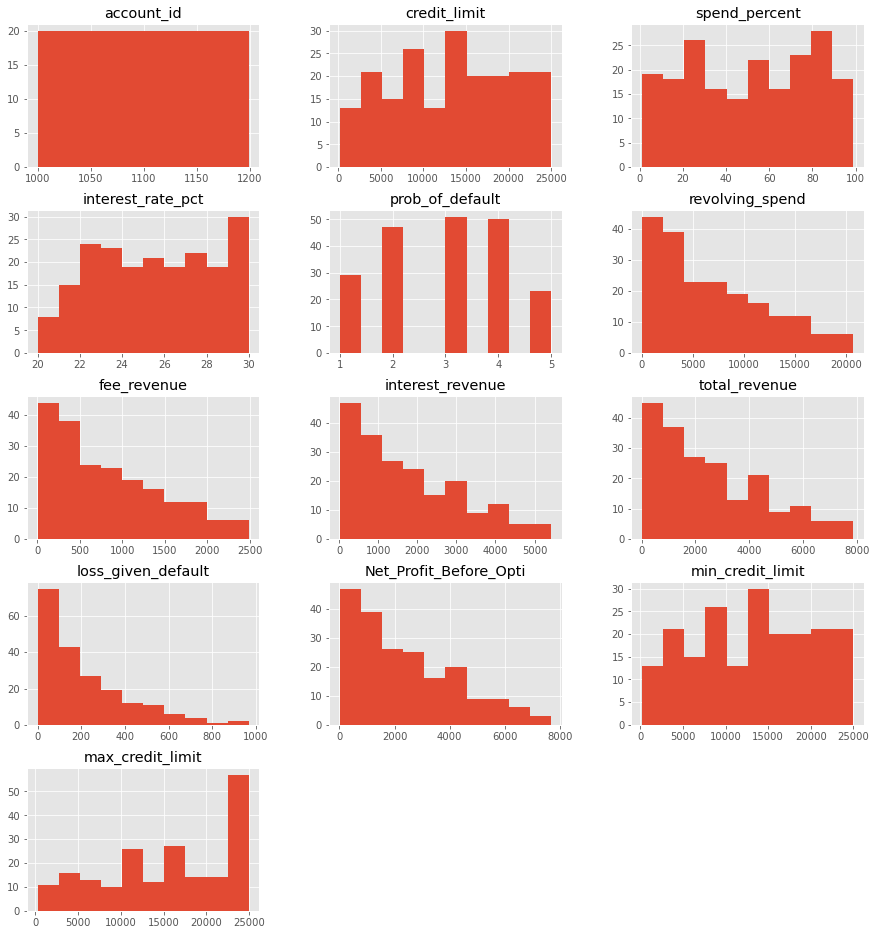

In [294]:
df.hist(figsize=(15,30),layout=(9,3))

In [284]:
#using pulp from here to optimize
#Defining Linear Programming Problem
model = LpProblem('Credit_Card_Portfolio_Optimization', LpMaximize )

In [285]:
lower_bound = []
for rownum, row in df.iterrows():
    lb = row['min_credit_limit'] 
    #lb_val =  (str(lb)) 
    lower_bound.append(lb)  

In [286]:
number_of_var = len(lower_bound) 

In [287]:
upper_bound = []
for rownum, row in df.iterrows():
    ub = row['max_credit_limit'] 
    upper_bound.append(ub)  

In [288]:
decision_variables = [LpVariable(f"x{i}", lowBound=lower_bound[i], upBound=upper_bound[i], cat=LpInteger) for i in range(number_of_var)]

In [289]:
# creating optimization function
# here we are optimizing net gains ( Revenue - loss when default )

net_gain = ""
for rownum, row in df.iterrows():
    for i, dv in enumerate(decision_variables):
        if rownum == i:
            net_gain += dv * ( row['spend_percent'] / 100 ) * ( 
                              (0.01) * 12  # Annual Fee Revenue as a percent of spend value
                           +  (row['interest_rate_pct'] /( 100  ))  # Annual Interest Revenue
                           -  (row['prob_of_default'] / 100)  # Loss Given Default
                           )   
                    
model += net_gain
print ( "Objective function : "+ str(net_gain))

Objective function : 0.17279999999999998*x0 + 0.2394*x1 + 0.05099999999999999*x10 + 0.1479*x100 + 0.18700000000000003*x101 + 0.0224*x102 + 0.2964*x103 + 0.3182*x104 + 0.3348*x105 + 0.033*x106 + 0.3069*x107 + 0.3268*x108 + 0.34040000000000004*x109 + 0.20879999999999999*x11 + 0.1024*x110 + 0.2752*x111 + 0.0704*x112 + 0.24359999999999998*x113 + 0.1386*x114 + 0.25839999999999996*x115 + 0.22680000000000003*x116 + 0.28159999999999996*x117 + 0.1326*x118 + 0.20719999999999997*x119 + 0.0546*x12 + 0.2432*x120 + 0.08*x121 + 0.17020000000000002*x122 + 0.1443*x123 + 0.11159999999999998*x124 + 0.21*x125 + 0.186*x126 + 0.1156*x127 + 0.07039999999999999*x128 + 0.07020000000000001*x129 + 0.132*x13 + 0.2695*x130 + 0.034999999999999996*x131 + 0.06659999999999999*x132 + 0.24180000000000001*x133 + 0.0744*x134 + 0.21239999999999998*x135 + 0.018*x136 + 0.1596*x137 + 0.16640000000000002*x138 + 0.3182*x139 + 0.2997*x14 + 0.0912*x140 + 0.28159999999999996*x141 + 0.1295*x142 + 0.2813*x143 + 0.0806*x144 + 0.213*x

In [290]:
# Display problems
print (model)
model.writeLP("Credit_Card_Portfolio_Optimization.lp" )

Credit_Card_Portfolio_Optimization:
MAXIMIZE
0.17279999999999998*x0 + 0.2394*x1 + 0.05099999999999999*x10 + 0.1479*x100 + 0.18700000000000003*x101 + 0.0224*x102 + 0.2964*x103 + 0.3182*x104 + 0.3348*x105 + 0.033*x106 + 0.3069*x107 + 0.3268*x108 + 0.34040000000000004*x109 + 0.20879999999999999*x11 + 0.1024*x110 + 0.2752*x111 + 0.0704*x112 + 0.24359999999999998*x113 + 0.1386*x114 + 0.25839999999999996*x115 + 0.22680000000000003*x116 + 0.28159999999999996*x117 + 0.1326*x118 + 0.20719999999999997*x119 + 0.0546*x12 + 0.2432*x120 + 0.08*x121 + 0.17020000000000002*x122 + 0.1443*x123 + 0.11159999999999998*x124 + 0.21*x125 + 0.186*x126 + 0.1156*x127 + 0.07039999999999999*x128 + 0.07020000000000001*x129 + 0.132*x13 + 0.2695*x130 + 0.034999999999999996*x131 + 0.06659999999999999*x132 + 0.24180000000000001*x133 + 0.0744*x134 + 0.21239999999999998*x135 + 0.018*x136 + 0.1596*x137 + 0.16640000000000002*x138 + 0.3182*x139 + 0.2997*x14 + 0.0912*x140 + 0.28159999999999996*x141 + 0.1295*x142 + 0.2813*x143

[x0,
 x1,
 x10,
 x100,
 x101,
 x102,
 x103,
 x104,
 x105,
 x106,
 x107,
 x108,
 x109,
 x11,
 x110,
 x111,
 x112,
 x113,
 x114,
 x115,
 x116,
 x117,
 x118,
 x119,
 x12,
 x120,
 x121,
 x122,
 x123,
 x124,
 x125,
 x126,
 x127,
 x128,
 x129,
 x13,
 x130,
 x131,
 x132,
 x133,
 x134,
 x135,
 x136,
 x137,
 x138,
 x139,
 x14,
 x140,
 x141,
 x142,
 x143,
 x144,
 x145,
 x146,
 x147,
 x148,
 x149,
 x15,
 x150,
 x151,
 x152,
 x153,
 x154,
 x155,
 x156,
 x157,
 x158,
 x159,
 x16,
 x160,
 x161,
 x162,
 x163,
 x164,
 x165,
 x166,
 x167,
 x168,
 x169,
 x17,
 x170,
 x171,
 x172,
 x173,
 x174,
 x175,
 x176,
 x177,
 x178,
 x179,
 x18,
 x180,
 x181,
 x182,
 x183,
 x184,
 x185,
 x186,
 x187,
 x188,
 x189,
 x19,
 x190,
 x191,
 x192,
 x193,
 x194,
 x195,
 x196,
 x197,
 x198,
 x199,
 x2,
 x20,
 x21,
 x22,
 x23,
 x24,
 x25,
 x26,
 x27,
 x28,
 x29,
 x3,
 x30,
 x31,
 x32,
 x33,
 x34,
 x35,
 x36,
 x37,
 x38,
 x39,
 x4,
 x40,
 x41,
 x42,
 x43,
 x44,
 x45,
 x46,
 x47,
 x48,
 x49,
 x5,
 x50,
 x51,
 x52,
 x53,
 x54,


In [291]:
#now run optimization
optimization_result = model.solve()
assert optimization_result == LpStatusOptimal
print("Status:", LpStatus[model.status])
Total = df["Net_Profit_Before_Opti"].sum()
print ("Net_Profit_Before_Optimization" ,Total)
print("Optimal Solution to the problem: ", value(model.objective))
net_gain_before_vs_after_optimization = value(model.objective) - Total
print("net_gain_before_vs_after_optimization", net_gain_before_vs_after_optimization)
print ("Individual decision_variables: ")
for v in model.variables():
    print(v.name, "=", v.varValue)

Status: Optimal
Net_Profit_Before_Optimization 471038.0
Optimal Solution to the problem:  549042.2640000001
net_gain_before_vs_after_optimization 78004.26400000008
Individual decision_variables: 
x0 = 15120.0
x1 = 25000.0
x10 = 25000.0
x100 = 6480.0
x101 = 10320.0
x102 = 3360.0
x103 = 13560.0
x104 = 25000.0
x105 = 4200.0
x106 = 11880.0
x107 = 20760.0
x108 = 22560.0
x109 = 13080.0
x11 = 22800.0
x110 = 6000.0
x111 = 25000.0
x112 = 5400.0
x113 = 4800.0
x114 = 15000.0
x115 = 10800.0
x116 = 25000.0
x117 = 3360.0
x118 = 25000.0
x119 = 19440.0
x12 = 20760.0
x120 = 20880.0
x121 = 15840.0
x122 = 17160.0
x123 = 22920.0
x124 = 8880.0
x125 = 24840.0
x126 = 17280.0
x127 = 17640.0
x128 = 19680.0
x129 = 25000.0
x13 = 11400.0
x130 = 3600.0
x131 = 25000.0
x132 = 17160.0
x133 = 11400.0
x134 = 25000.0
x135 = 6360.0
x136 = 1080.0
x137 = 11880.0
x138 = 10680.0
x139 = 10440.0
x14 = 25000.0
x140 = 4200.0
x141 = 11880.0
x142 = 7200.0
x143 = 11160.0
x144 = 7800.0
x145 = 7080.0
x146 = 3840.0
x147 = 25000.0
x148